<a href="https://colab.research.google.com/github/CrodriguezCode/TalentoTech/blob/main/Actividad_Clasificacion_Red_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Wine Quality Classification https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009
**About Dataset**
Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Output variable (based on sensory data):
12. quality (score between 0 and 10)


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
vino = pd.read_csv("winequality.csv")
vino.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
vino.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


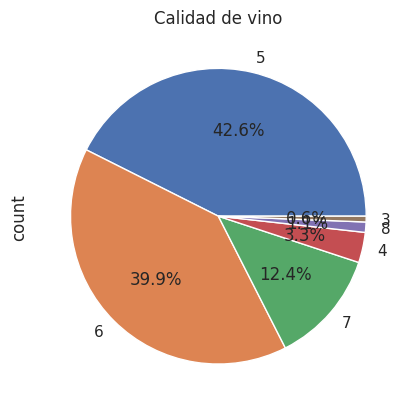

In [ ]:
svm_palette = ['#3d5a80', '#98c1d9', '#ee6c4d', '#293241']
plt.title("Calidad de vino")
vino['quality'].value_counts().plot.pie(autopct="%1.1f%%");

<ipython-input-24-dad5b4da37e1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'quality', y = 'fixed acidity', data = vino, palette = svm_palette)
<ipython-input-24-dad5b4da37e1>:5: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(x = 'quality', y = 'fixed acidity', data = vino, palette = svm_palette)
<ipython-input-24-dad5b4da37e1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'quality', y = 'volatile acidity', data = vino, palette = svm_palette)
<ipython-input-24-dad5b4da37e1>:7: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may pro

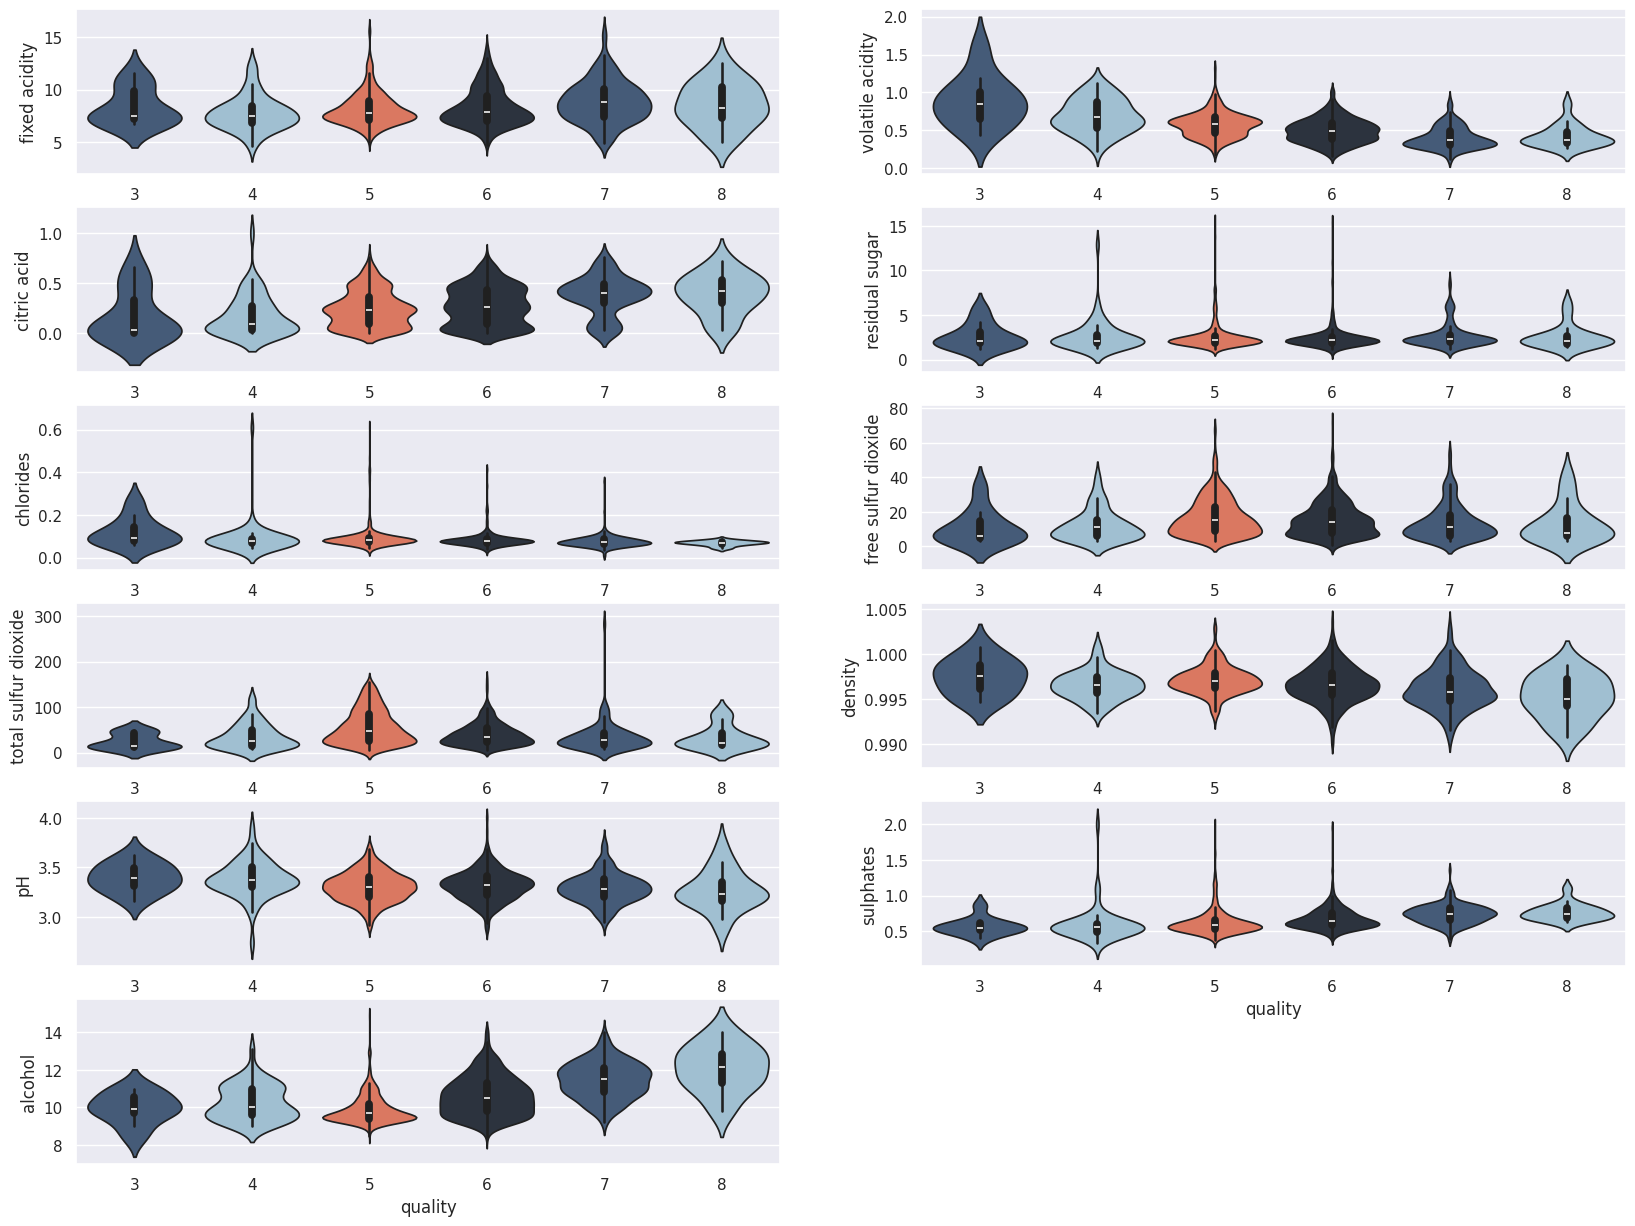

In [ ]:
# Analizando las caracteristicas del vino en diagramas de violín
plt.figure(figsize=(20,15))
sns.set_style('darkgrid')
plt.subplot(6,2,1)
sns.violinplot(x = 'quality', y = 'fixed acidity', data = vino, palette = svm_palette)
plt.subplot(6,2,2)
sns.violinplot(x = 'quality', y = 'volatile acidity', data = vino, palette = svm_palette)
plt.subplot(6,2,3)
sns.violinplot(x = 'quality', y = 'citric acid', data = vino, palette = svm_palette)
plt.subplot(6,2,4)
sns.violinplot(x = 'quality', y = 'residual sugar', data = vino, palette = svm_palette)
plt.subplot(6,2,5)
sns.violinplot(x = 'quality', y = 'chlorides', data = vino, palette = svm_palette)
plt.subplot(6,2,6)
sns.violinplot(x = 'quality', y = 'free sulfur dioxide', data = vino, palette = svm_palette)
plt.subplot(6,2,7)
sns.violinplot(x = 'quality', y = 'total sulfur dioxide', data = vino, palette = svm_palette)
plt.subplot(6,2,8)
sns.violinplot(x = 'quality', y = 'density', data = vino, palette = svm_palette)
plt.subplot(6,2,9)
sns.violinplot(x = 'quality', y = 'pH', data = vino, palette = svm_palette)
plt.subplot(6,2,10)
sns.violinplot(x = 'quality', y = 'sulphates', data = vino, palette = svm_palette)
plt.subplot(6,2,11)
sns.violinplot(x = 'quality', y = 'alcohol', data = vino, palette = svm_palette);



In [ ]:
#sns.pairplot(vino, hue = 'quality', vars = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],  palette=svm_palette[1:] );

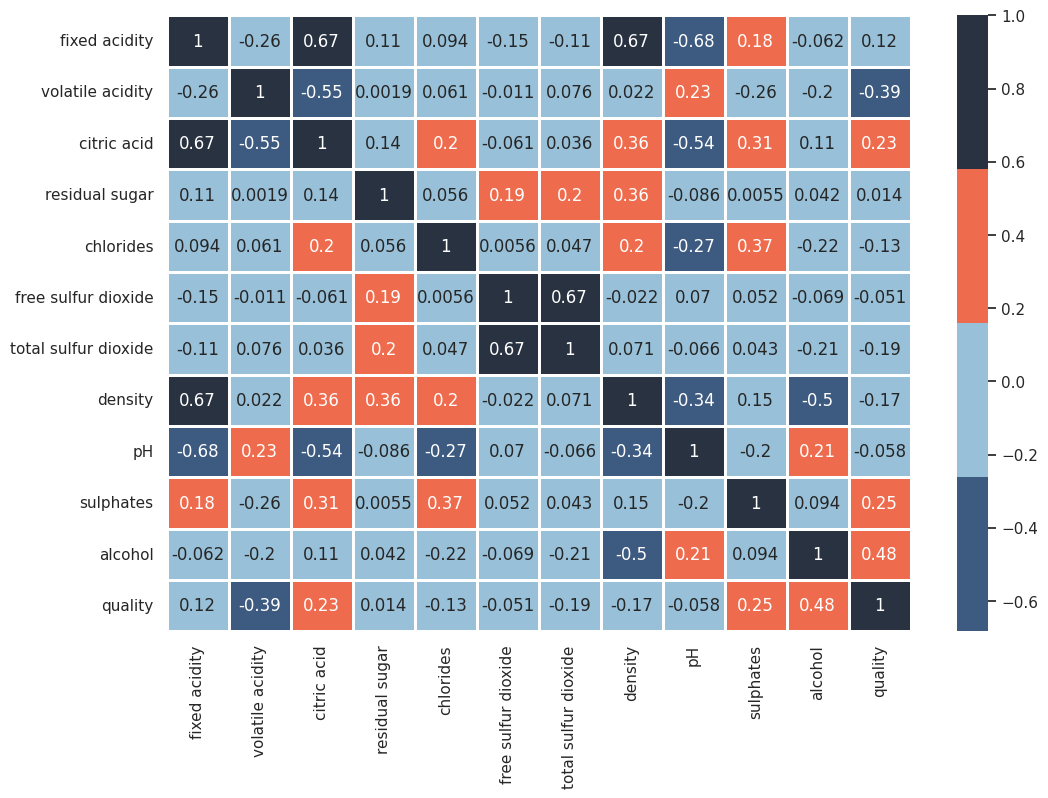

In [ ]:
# revisando la correlación entre las variables
plt.figure(figsize=(12,8))
sns.heatmap(vino.corr(), annot=True, cmap=svm_palette, linewidths = 2) # calcular correlación y graficar como mapa de calor
plt.show()

## 1.2 Preparando los datos para entrenar modelos
En la etapa de preparación de los datos crearemos una partición para tener un conjunto de datos de entrenamiento y un conjunto de datos de validación.


In [ ]:
X = vino.iloc[:, 0:10] # X seran todas las filas con las columnas de la 0 a la 11 (caracteristicas)
y = vino.iloc[:, 11].values # y seran las calidades de vino (quality)

from sklearn.model_selection import train_test_split

# The rest of your code remains the same
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 101)

print(f'Número total de muestras en el dataset: {len(X)}')
print("*****"*10)
print(f'Muestras para entrenamiento: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Muestras para validación: {len(X_test)}')
print(f'Tamaño de X_test: {X_test.shape}')

Número total de muestras en el dataset: 1599
**************************************************
Muestras para entrenamiento: 1279
Tamaño de X_train: (1279, 10)
**************************************************
Muestras para validación: 320
Tamaño de X_test: (320, 10)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# Una buena práctica es ajustar los datos para que tengan media cero y varianza uno.
#Es decir, alteramos linealmente los datos para que estén escalados entre -1 y 1 de tal
#forma que el entrenamiento de los modelos sea más rápido y mas estable numéricamente.
#Con esto se evitan problemas de explosión de gradientes.
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 2. Empleando modelos de clasificación con los datos preparados
Ya que se han pre procesado los datos y calculado sus características, procedemos a crear modelos que permitan resolver el problema de clasificación.

### 2.1 SVMs

In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)

train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 66.8491008600469
Test score of trained model: 60.62499999999999


Confussion Matrix: 
[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  3  11 101  35   6   0]
 [  0   3  36  81  21   3]
 [  0   1   1   6  12   0]
 [  0   0   0   0   0   0]]



<Axes: >

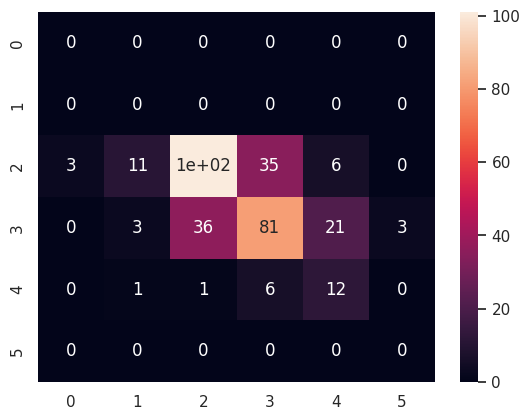

In [ ]:
# Una forma de medir el desempeño de un modelo de clasificación es mediante el uso de la
#matriz de confusión que ayuda a saber qué tan bien fueron clasificados los datos
# en la matriz de confusion se saben cuantos fueron verdaderos positivos y verdaderos negativos (clasificaciones correctas)
# falsos positivos y falsos negativos (clasificaciones incorrectas).
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(pred, y_test)
print(f'Confussion Matrix: \n{conf_matrix}\n')
sns.heatmap(conf_matrix, annot=True)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.65      0.73      0.69       138
           6       0.56      0.66      0.61       122
           7       0.60      0.31      0.41        39
           8       0.00      0.00      0.00         3

    accuracy                           0.61       320
   macro avg       0.30      0.28      0.28       320
weighted avg       0.57      0.61      0.58       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2.3 Regresión logística

In [ ]:
# separando el dataset
X = vino.iloc[:, 0:10].values
y = vino.iloc[:, 11].values
# preprocesando los datos para que tengan media cero y desviación de uno
sc = StandardScaler()
X = sc.fit_transform(X)
# particionando
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# Ajustando el modelo
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', multi_class="auto")
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# predicioendo los resultados
y_pred = classifier.predict(X_test)
probs_y = classifier.predict_proba(X_test) # mirando las probabilidades de las predicciones


In [ ]:
# Evaluando matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,   7,   5,   1,   0],
       [  1,   0, 138,  32,   1,   0],
       [  0,   0,  51, 105,   9,   0],
       [  0,   0,   5,  26,  14,   0],
       [  0,   0,   0,   2,   2,   0]])

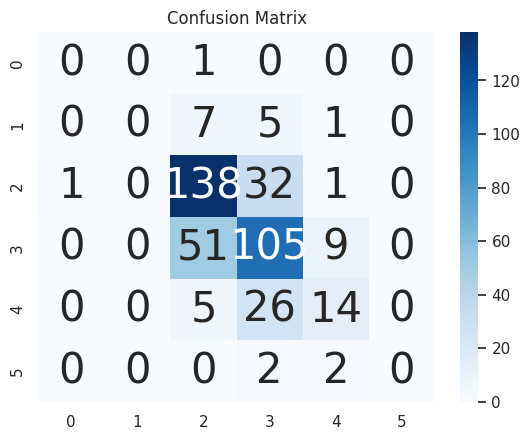

In [ ]:
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.68      0.80      0.74       172
           6       0.62      0.64      0.63       165
           7       0.52      0.31      0.39        45
           8       0.00      0.00      0.00         4

    accuracy                           0.64       400
   macro avg       0.30      0.29      0.29       400
weighted avg       0.61      0.64      0.62       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ROC Curve

In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, probs_y, multi_class='ovo')  # Or multi_class='ovo'
print('AUC: %.3f' % auc)

AUC: 0.742


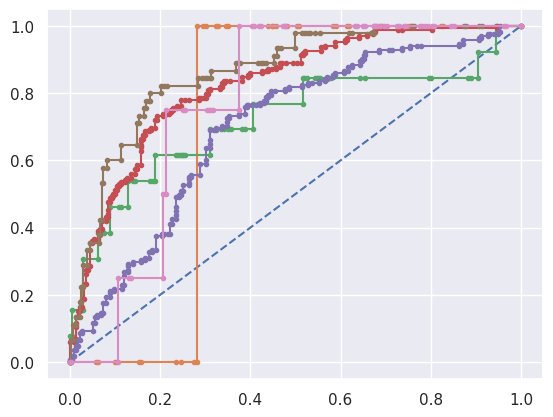

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# calculate roc curves for each class
fpr = dict()
tpr = dict()
thresholds = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_bin[:, i], probs_y[:, i])

# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], marker='.')
plt.show()